### Q-4. 
Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\DATA SCIENCE\FSDS - May 22\Ineuron_Placement_Assessment\3. ML\online_shoppers_intention.csv")

In [3]:
# Display first 5 records of the data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Display last 5 records of the data
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
# Check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Checking shape of the data
df.shape

(12330, 18)

In [7]:
# Statistical Summary
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
# Statistical Summary for object variable
df.describe(include = 'object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [9]:
# Check for null values if any
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### we have no missing values in any of the columns

In [10]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: xlabel='Revenue', ylabel='count'>

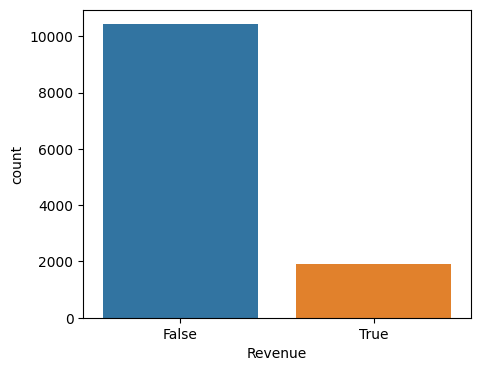

In [11]:
# Check the target column i.e. Revenue
fig, axs = plt.subplots(figsize=(5,4))
sns.countplot(x='Revenue',data=df,ax=axs)

In [12]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [13]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

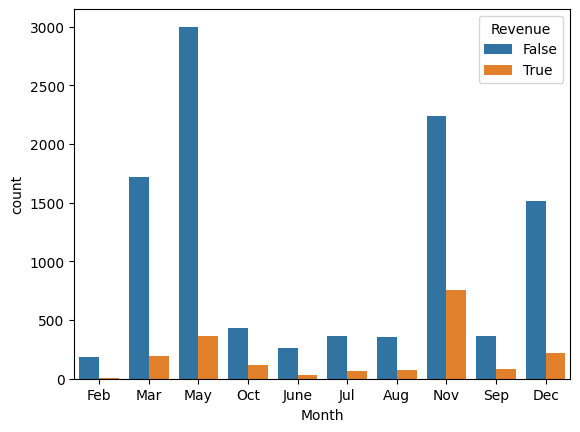

In [14]:
sns.countplot(x='Month',data=df,hue='Revenue')

<Axes: xlabel='Month', ylabel='count'>

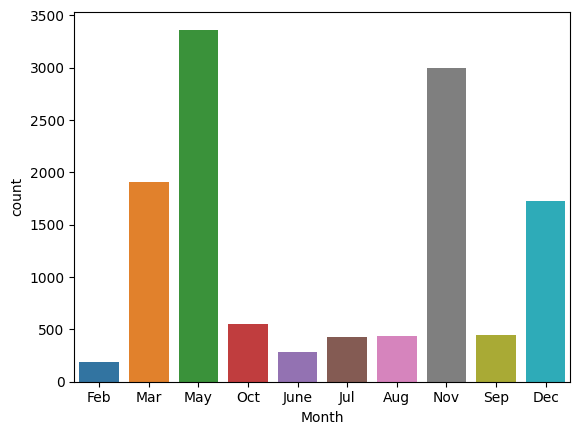

In [15]:
sns.countplot(x='Month',data=df)

In [16]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<Axes: xlabel='VisitorType', ylabel='count'>

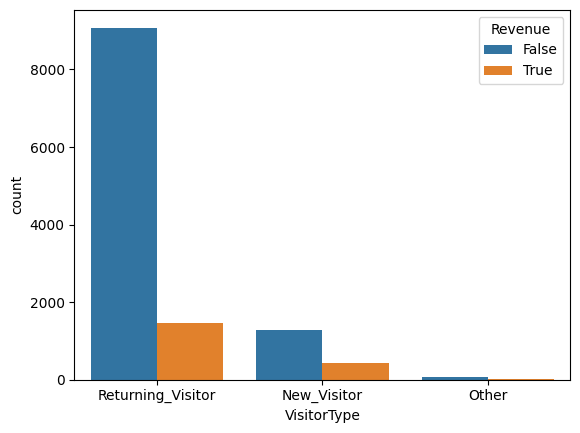

In [19]:
sns.countplot(x = df['VisitorType'],hue=df['Revenue'])

In [20]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

<Axes: xlabel='Weekend', ylabel='count'>

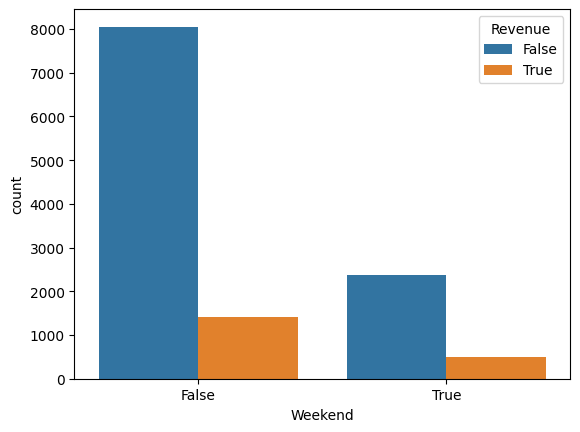

In [21]:
sns.countplot(x=df['Weekend'],hue=df['Revenue'])

In [22]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

<Axes: xlabel='SpecialDay', ylabel='count'>

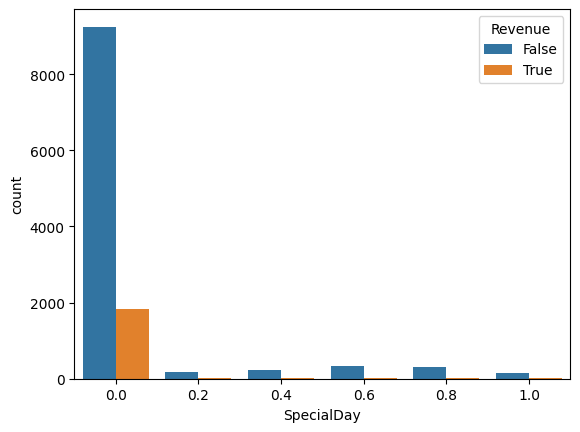

In [24]:
sns.countplot(x=df['SpecialDay'],hue=df['Revenue'])

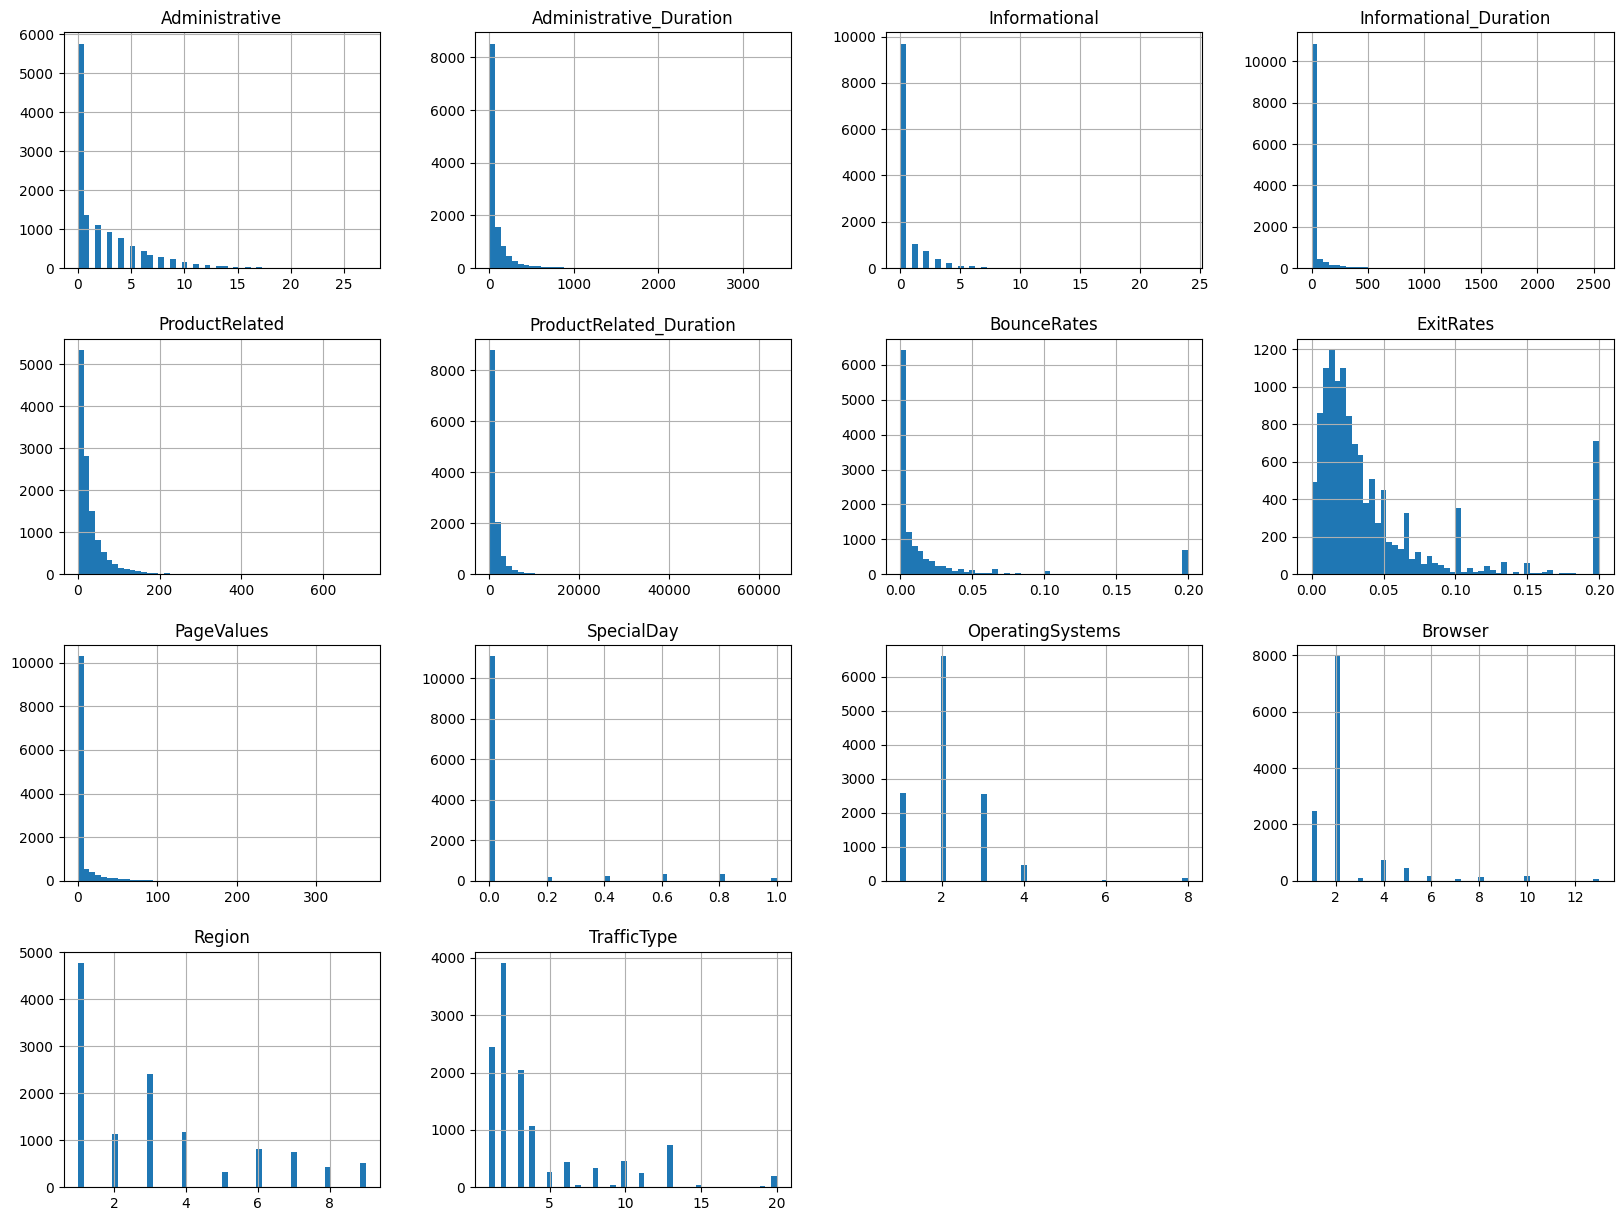

In [26]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
#Check how many duplicate rows there are
dup_data = df[df.duplicated()]

In [29]:
dup_data.shape

(125, 18)

In [30]:
#Drop duplicates
data = df.drop_duplicates(keep='last')
data.shape

(12205, 18)

In [32]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [33]:
# Handling Categorical Feature Month
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [34]:
data['Month'] = data['Month'].map({'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':10})

In [35]:
# Handling Categorical Feature VisitorType
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [36]:
data['VisitorType'] = data['VisitorType'].map({'Returning_Visitor':1, 'New_Visitor':2, 'Other':3})

In [37]:
# Handling Categorical Feature Weekend
data['Weekend'].unique()

array([False,  True])

In [38]:
data['Weekend'] = data['Weekend'].map({False:0,  True:1})

In [39]:
# Handling Categorical Feature Revenue
data['Revenue'].unique()

array([False,  True])

In [40]:
data['Revenue'] = data['Revenue'].map({False:0,  True:1})

In [41]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


<Axes: >

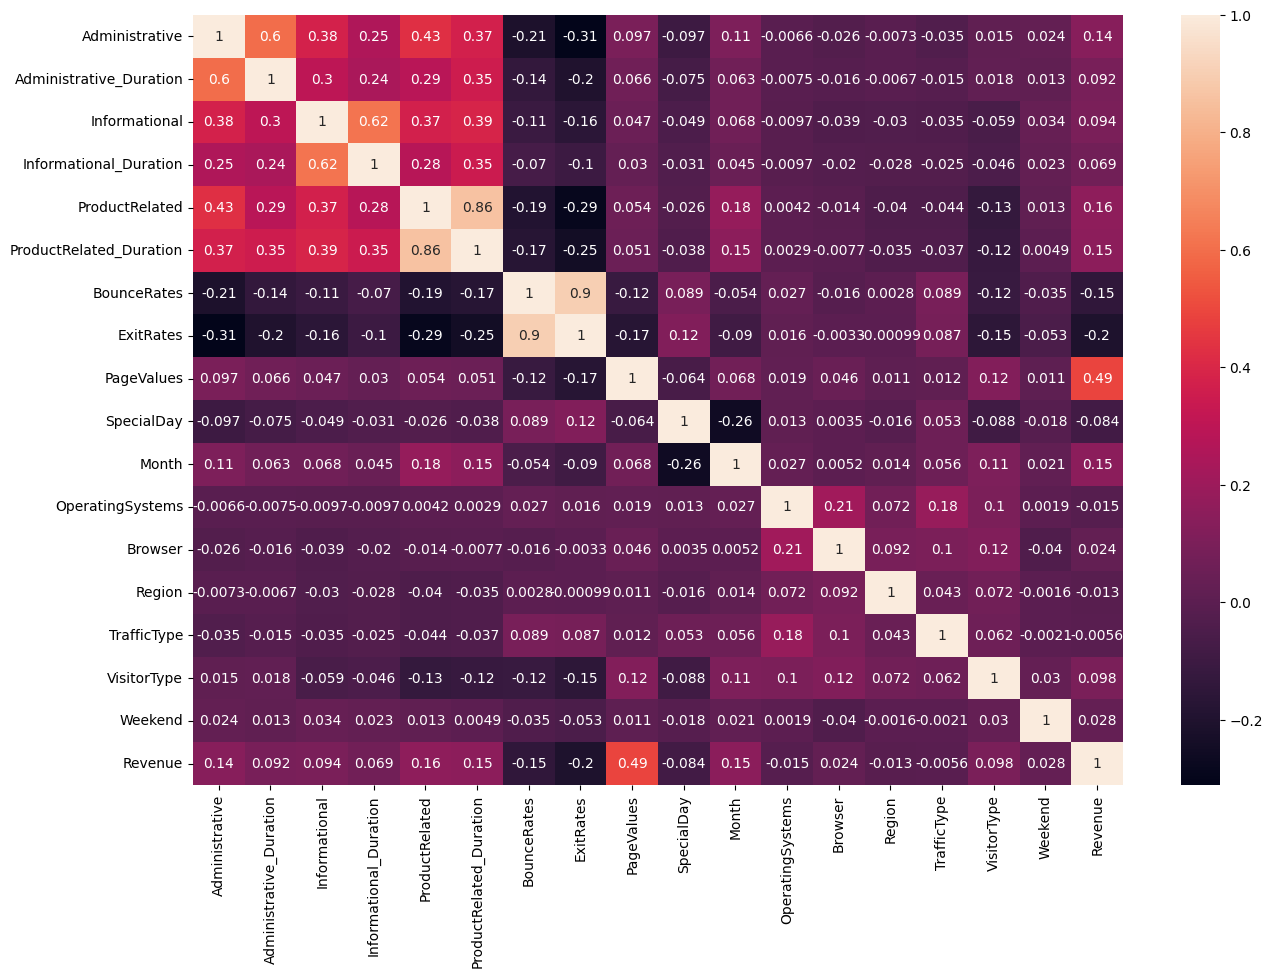

In [42]:
# Correlation between numerical variables using Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

In [43]:
# Split the data into X & y
# Independent and Dependent Features
X=data.drop(['Revenue'],axis=1)
y=data['Revenue']

In [47]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 42)

In [48]:
X_train.shape , y_train.shape

((9153, 17), (9153,))

In [49]:
X_test.shape, y_test.shape

((3052, 17), (3052,))

In [50]:
# Standardize or feature scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Model using ensemble learning algorithm
# Using Voting Classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = RandomForestClassifier()

In [54]:
model_vote = VotingClassifier(estimators=[('lr', r1), ('dt', r2), ('rf', r3)],voting='hard')
model_vote.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [61]:
model_vote.score(X_train,y_train)

1.0

In [57]:
y_pred_vote = model_vote.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [60]:
accuracy=accuracy_score(y_test,y_pred_vote)
accuracy

0.9030144167758847

In [62]:
# Confusion Matrix
conf_mat_vote = confusion_matrix(y_test,y_pred_vote)
conf_mat_vote

array([[2503,   70],
       [ 226,  253]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_vote))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2573
           1       0.78      0.53      0.63       479

    accuracy                           0.90      3052
   macro avg       0.85      0.75      0.79      3052
weighted avg       0.90      0.90      0.90      3052



In [65]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_vote)
auc

0.7504890597476443

In [67]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_vote)

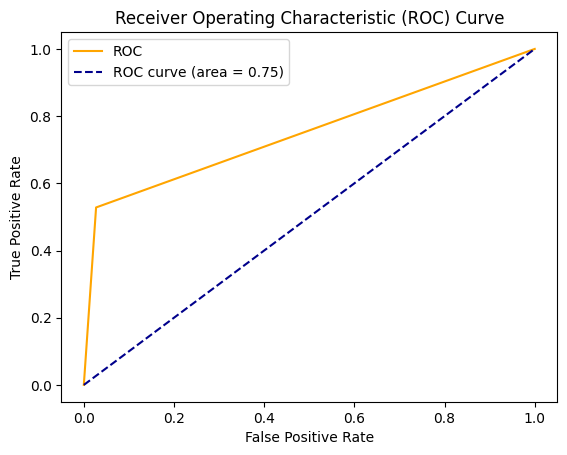

In [68]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

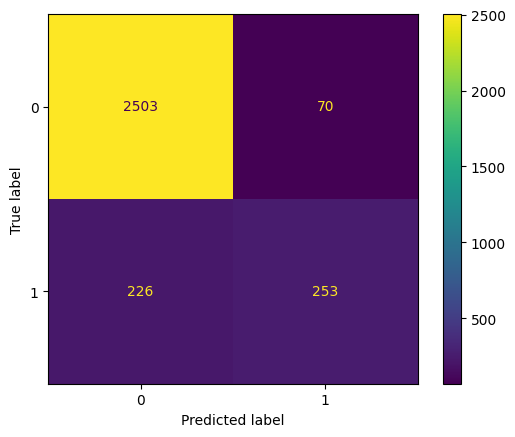

In [74]:
cm = confusion_matrix(y_test, y_pred_vote, labels=model_vote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_vote.classes_)
disp.plot()
plt.show()